<a href="https://colab.research.google.com/github/CoderShital/Handwritten-Digit-Recoginition/blob/main/MNIST_Handwritten_Digit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Input, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical


In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32')/255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32')/255

In [ ]:
model = Sequential()

In [ ]:
model.add(Input(shape = (28, 28, 1)))

model.add(Conv2D(32, (3, 3), activation = 'relu' ))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9984 - loss: 0.0045 - val_accuracy: 0.9880 - val_loss: 0.0470
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9986 - loss: 0.0044 - val_accuracy: 0.9920 - val_loss: 0.0343
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.9985 - loss: 0.0043 - val_accuracy: 0.9907 - val_loss: 0.0369
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9984 - loss: 0.0045 - val_accuracy: 0.9921 - val_loss: 0.0353
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9988 - loss: 0.0036 - val_accuracy: 0.9919 - val_loss: 0.0400
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9994 - loss: 0.0024 - val_accuracy: 0.9911 - val_loss: 0.0412
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 32ms/step - accuracy: 0.9981 - loss: 0.0052 - val_accuracy: 0.9913 - val_loss: 0.0400
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 30ms/step - accuracy: 0.9990 -

In [ ]:
y_prob = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [ ]:
y_pred = y_prob.argmax(axis = 1)

In [ ]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

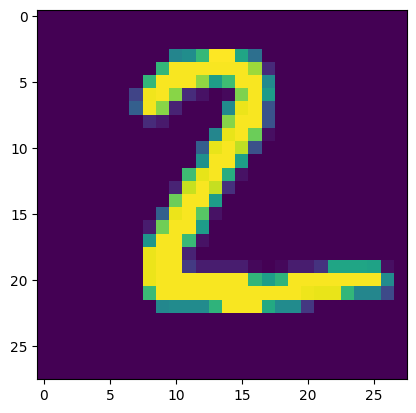

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_test[1])

In [ ]:
y_test[3]

np.uint8(0)

In [ ]:
import numpy as np
from keras.preprocessing import image
from PIL import Image, ImageOps

In [ ]:
img = Image.open(f"MNIST 4.jpg").convert('L')
img = img.resize((28, 28))
img = ImageOps.invert(img)

img_array = np.array(img).astype('float32') / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

In [ ]:
prediction = model.predict(img_array)
sample_img =  np.argmax(prediction)
print("Predicted Digit: ", sample_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Digit:  4
